<a href="https://colab.research.google.com/github/Winonymous/AI-Hacktober-MLSA/blob/First_project/Project_1/Image_Classification_Winonymous/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Project

In [1]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory # This is adviced in replace of Image Data Generator is depreciated and it those not allow image processing to happen on the GPU
import pandas as pd
import matplotlib.pyplot as plt
import random

# Explore the data

In [2]:
!git clone https://github.com/mlsanigeria/AI-Hacktober-MLSA.git

Cloning into 'AI-Hacktober-MLSA'...
remote: Enumerating objects: 5587, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (243/243), done.
remote: Total 5587 (delta 58), reused 253 (delta 48), pack-reused 5293
Receiving objects: 100% (5587/5587), 1.64 GiB | 20.06 MiB/s, done.
Resolving deltas: 100% (1653/1653), done.


In [3]:
# data_dir = "/media/lolade/New Volume/Programming/Projects/Github/AI-Hacktober-MLSA/Project_1/Data"
data_dir = "/content/AI-Hacktober-MLSA/Project_1/Data"

for dir, folders, files in os.walk(data_dir):
    print(f"{dir} contains {len(folders)} folders and {len(files)} files")

/content/AI-Hacktober-MLSA/Project_1/Data contains 3 folders and 0 files
/content/AI-Hacktober-MLSA/Project_1/Data/Bungalow contains 0 folders and 404 files
/content/AI-Hacktober-MLSA/Project_1/Data/Storey-building contains 0 folders and 619 files
/content/AI-Hacktober-MLSA/Project_1/Data/High-rise contains 0 folders and 168 files


Hence there are 3 classes <br>
229 images of Bungalow <br>
72 images of High-rise buildings <br>
486 images of Storey-buildings <br>

IMG_20231007_165023_050.jpeg
anu_storey_8.jpeg
IMG_20210817_124102 copy.jpeg


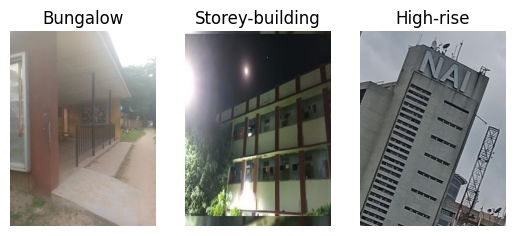

In [4]:
# Define paths for data
class_names = os.listdir(data_dir)

for index, cla in enumerate(class_names):
    class_dir = os.path.join(data_dir, cla)
    image_name = random.choice(os.listdir(class_dir))
    print(image_name)
    plt.subplot(1, 3, index + 1)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"{cla}")

# Define Constants

In [5]:
IMAGE_HEIGHT = 160 # The height the image is to be resized to
IMAGE_WIDTH = 160 # The width the image is to be resized to
IMG_SIZE  = (IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 32

# Implement Data Generators and Preprocessing pipeline

**This will create an easy preprocessing pipeline and will help load your data in batches**

In [6]:
print("The Training Dataset")
train_dataset = image_dataset_from_directory(data_dir, # The directory where the image dataset is stored
                                            seed = 32, # When spliiting the dataset we must use the seed parameter to improve its accuracy
                                            shuffle = True, # Shuffle the dataset
                                            batch_size = BATCH_SIZE, # Divide the dataset into 32 parts
                                            image_size = IMG_SIZE,
                                            validation_split = 0.2,
                                            label_mode = "categorical",
                                            subset = 'training') # The size of the image

print("The Validation Dataset")
Validation_dataset = image_dataset_from_directory(data_dir, # The directory where the image dataset is stored
                                            seed = 32, # When spliiting the dataset we must use the seed parameter to improve its accuracy
                                            shuffle = True, # Shuffle the dataset
                                            batch_size = BATCH_SIZE, # Divide the dataset into 32 parts
                                            label_mode = "categorical",
                                            image_size = IMG_SIZE,
                                            validation_split = 0.2,
                                            subset = 'validation')

The Training Dataset
Found 1191 files belonging to 3 classes.
Using 953 files for training.
The Validation Dataset
Found 1191 files belonging to 3 classes.
Using 238 files for validation.


# Model architecture

In [7]:
# Define the model architecture
Basemodel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for building types
])

# Compile the model
Basemodel.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



# Train the model

In [8]:

Basehistory = Basemodel.fit(
    train_dataset,
    epochs=10,
    validation_data=Validation_dataset
)


Epoch 1/10
30/30 [==============================] - 13s 77ms/step - loss: 422.4486 - accuracy: 0.4502 - val_loss: 1.4128 - val_accuracy: 0.4664
Epoch 2/10
30/30 [==============================] - 2s 51ms/step - loss: 0.8725 - accuracy: 0.6432 - val_loss: 1.1940 - val_accuracy: 0.5504
Epoch 3/10
30/30 [==============================] - 2s 39ms/step - loss: 0.4955 - accuracy: 0.8038 - val_loss: 1.7020 - val_accuracy: 0.5504
Epoch 4/10
30/30 [==============================] - 1s 40ms/step - loss: 0.2378 - accuracy: 0.9203 - val_loss: 2.0177 - val_accuracy: 0.5630
Epoch 5/10
30/30 [==============================] - 1s 39ms/step - loss: 0.1159 - accuracy: 0.9696 - val_loss: 2.6087 - val_accuracy: 0.5420
Epoch 6/10
30/30 [==============================] - 1s 39ms/step - loss: 0.1101 - accuracy: 0.9696 - val_loss: 2.3895 - val_accuracy: 0.5168
Epoch 7/10
30/30 [==============================] - 1s 36ms/step - loss: 0.2301 - accuracy: 0.9297 - val_loss: 2.1555 - val_accuracy: 0.5252
Epoch 8/10

# Evaluate the model

In [9]:

Base_loss, Base_acc = Basemodel.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {Base_acc*100:.2f}%')

8/8 - 0s - loss: 2.3703 - accuracy: 0.5462 - 249ms/epoch - 31ms/step
Test accuracy: 54.62%


It looks like the model is overfitting. Lets try to add data Augumentation and see the results

In [32]:
from tensorflow.keras.layers.experimental import preprocessing

Preprocesing_layer = tf.keras.Sequential([
    # preprocessing.RandomFlip("horizontal"),
    # preprocessing.RandomRotation(0.2),
    # preprocessing.RandomZoom(0.2),
    # preprocessing.RandomHeight(0.2),
    # preprocessing.RandomWidth(0.2),
    preprocessing.Rescaling(1./255.),
    tf.keras.layers.Resizing(IMAGE_HEIGHT, IMAGE_WIDTH)
], name = 'Augumentation_layer')

ay_bungalow 6.jpeg
IMG_20231006_140829_728.jpeg
ayn_highrise (34).jpeg


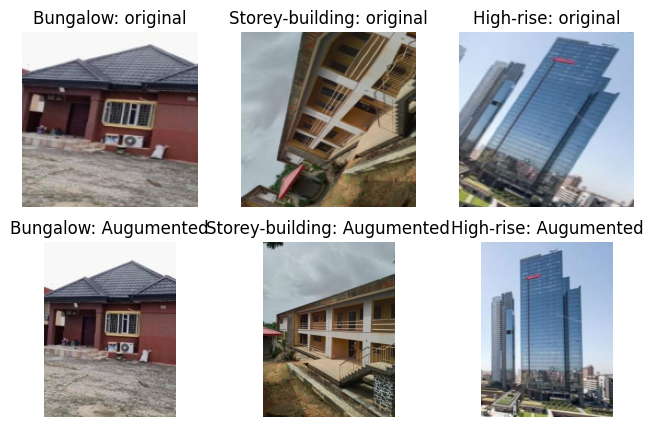

In [11]:
# Lets test it

# Define paths for data
class_names = os.listdir(data_dir)

plt.figure(figsize=(8, 5))

for index, cla in enumerate(class_names):
    class_dir = os.path.join(data_dir, cla)
    image_name = random.choice(os.listdir(class_dir))
    print(image_name)
    plt.subplot(2, 3, index + 1)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(Preprocesing_layer(img))
    plt.axis(False)
    plt.title(f"{cla}: original")
    plt.subplot(2, 3, index + 1 + 3)
    img = plt.imread(os.path.join(class_dir, image_name))
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"{cla}: Augumented")

Seams like the layer is working well lets train a new model

In [12]:
# Define the model architecture
Augmodel = tf.keras.Sequential([
    Preprocesing_layer,
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for building types
])

# Compile the model
Augmodel.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



In [13]:
Aughistory = Augmodel.fit(
    train_dataset,
    epochs=20,
    validation_data=Validation_dataset
)

Epoch 1/20
30/30 [==============================] - 6s 79ms/step - loss: 2.1571 - accuracy: 0.4963 - val_loss: 1.1503 - val_accuracy: 0.4706
Epoch 2/20
30/30 [==============================] - 4s 116ms/step - loss: 0.9033 - accuracy: 0.5215 - val_loss: 0.9092 - val_accuracy: 0.5042
Epoch 3/20
30/30 [==============================] - 3s 74ms/step - loss: 0.8654 - accuracy: 0.5635 - val_loss: 0.9170 - val_accuracy: 0.5042
Epoch 4/20
30/30 [==============================] - 2s 74ms/step - loss: 0.8653 - accuracy: 0.5761 - val_loss: 0.8626 - val_accuracy: 0.5588
Epoch 5/20
30/30 [==============================] - 3s 74ms/step - loss: 0.8028 - accuracy: 0.6002 - val_loss: 0.9395 - val_accuracy: 0.5714
Epoch 6/20
30/30 [==============================] - 3s 79ms/step - loss: 0.7909 - accuracy: 0.6233 - val_loss: 0.8475 - val_accuracy: 0.5630
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.7525 - accuracy: 0.6348 - val_loss: 0.9036 - val_accuracy: 0.5882
Epoch 8/20
3

In [14]:
Aug_loss, Aug_acc = Augmodel.evaluate(Validation_dataset, verbose=2)
print(f'Test accuracy: {Aug_acc*100:.2f}%')

8/8 - 0s - loss: 0.7758 - accuracy: 0.6723 - 324ms/epoch - 41ms/step
Test accuracy: 67.23%


## Lets try finetunning the model

In [77]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5'

In [83]:
import tensorflow_hub as hub

resnet_extraction_layer = hub.KerasLayer(resnet_url,
                    trainable = False,
                    name = 'Feature_Extraction_Layer',
                    input_shape = IMG_SIZE + (3, ))

# Resnet model
model_resnet = tf.keras.Sequential([
    Preprocesing_layer,
    resnet_extraction_layer,
    tf.keras.layers.Dense(3,
                          activation = 'softmax',
                          name = 'Output_Layer')
])

In [84]:
model_resnet.compile(loss = "categorical_crossentropy",
                        optimizer = 'Adam',
                        metrics = ['accuracy'])

In [85]:
resnet_model_history = model_resnet.fit(
    train_dataset,
    epochs=20,
    validation_data=Validation_dataset
)

Epoch 1/20
30/30 [==============================] - 8s 122ms/step - loss: 0.7243 - accuracy: 0.6810 - val_loss: 0.4787 - val_accuracy: 0.7983
Epoch 2/20
30/30 [==============================] - 2s 64ms/step - loss: 0.3583 - accuracy: 0.8458 - val_loss: 0.3914 - val_accuracy: 0.8571
Epoch 3/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2697 - accuracy: 0.8867 - val_loss: 0.3780 - val_accuracy: 0.8571
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.2259 - accuracy: 0.9108 - val_loss: 0.3384 - val_accuracy: 0.8613
Epoch 5/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1993 - accuracy: 0.9339 - val_loss: 0.3436 - val_accuracy: 0.8655
Epoch 6/20
30/30 [==============================] - 3s 94ms/step - loss: 0.1774 - accuracy: 0.9423 - val_loss: 0.3433 - val_accuracy: 0.8655
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1602 - accuracy: 0.9465 - val_loss: 0.3124 - val_accuracy: 0.8739
Epoch 8/20
3

In [86]:
model_resnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Augumentation_layer (Seque  (None, 160, 160, 3)       0         
 ntial)                                                          
                                                                 
 Feature_Extraction_Layer (  (None, 2048)              23561152  
 KerasLayer)                                                     
                                                                 
 Output_Layer (Dense)        (None, 3)                 6147      
                                                                 
Total params: 23567299 (89.90 MB)
Trainable params: 6147 (24.01 KB)
Non-trainable params: 23561152 (89.88 MB)
_________________________________________________________________


In [56]:
path_to_save_model = 'Model/BaseModel'

# Save the entire model (including architecture, weights, and optimizer state)
model.save(path_to_save_model)

NameError: ignored